<a href="https://colab.research.google.com/github/LisaD002/Capstone-Project/blob/main/CIND820_Capstone_Project_Time_Series_Analysis_500853587.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Relevant Packages 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns 
sns.set()

Importing the Data and Pre-processing 

In [6]:
raw_csv_data= pd.read_csv("COVID-19_Diagnostic_Laboratory_Testing__PCR_Testing__Time_Series (3).csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp= df_comp.fillna(method= 'ffill')

Examining the Data

In [ ]:
df_comp.head()

,state,state_name,state_fips,fema_region,overall_outcome,new_results_reported,total_results_reported,geocoded_state
date,,,,,,,,
2020-03-01,AL,Alabama,1,Region 4,Negative,96,96,NaN
2020-03-01,AL,Alabama,1,Region 4,Positive,16,16,NaN
2020-03-02,AL,Alabama,1,Region 4,Negative,72,168,NaN
2020-03-02,AL,Alabama,1,Region 4,Positive,6,22,NaN
2020-03-03,AL,Alabama,1,Region 4,Negative,94,262,NaN


In [ ]:
#data- values recorded
# analyze time series in cosecutive chunks of data
# dates are used as indexes/indices for time series
# next 8 columns - time series data of state, state_name, region and numerical values for new results reported and total results reported; geocoded state - NAN
# new results reported and total results reported - number of daily PCR tests conducted

In [ ]:
#check data types
df_comp.dtypes

state                      object
state_name                 object
state_fips                  int64
fema_region                object
overall_outcome            object
new_results_reported        int64
total_results_reported      int64
geocoded_state            float64
dtype: object

In [ ]:
df_comp.shape

(156969, 8)

In [ ]:
#Check columns
df_comp.columns

Index(['state', 'state_name', 'state_fips', 'fema_region', 'overall_outcome',
       'new_results_reported', 'total_results_reported', 'geocoded_state'],
      dtype='object')

In [ ]:
#Check for NA values
df_comp.isnull().sum()

state                          0
state_name                     0
state_fips                     0
fema_region                    0
overall_outcome                0
new_results_reported           0
total_results_reported         0
geocoded_state            156969
dtype: int64

In [ ]:
df_time = df_comp[['new_results_reported', 'total_results_reported']].dropna()
df_time.head()

,new_results_reported,total_results_reported
date,,
2020-03-01,96,96
2020-03-01,16,16
2020-03-02,72,168
2020-03-02,6,22
2020-03-03,94,262


In [ ]:
df_time.loc['2020-03-01':'2020-12-31'].head(20)

,new_results_reported,total_results_reported
date,,
2020-03-01,96,96
2020-03-01,16,16
2020-03-02,72,168
2020-03-02,6,22
2020-03-03,94,262
2020-03-03,9,31
2020-03-04,0,262
2020-03-04,2,33
2020-03-05,61,323


In [ ]:
df_time.loc['2020-03-01':'2020-12-31'].count()

new_results_reported      48402
total_results_reported    48402
dtype: int64

In [ ]:
df_time.loc['2021-01-01': '2021-12-31'].head(20)

,new_results_reported,total_results_reported
date,,
2021-01-01,86,7650
2021-01-01,10774,2875592
2021-01-01,2549,407775
2021-01-02,42,7692
2021-01-02,6118,2881710
2021-01-02,2395,410170
2021-01-03,25,7717
2021-01-03,4580,2886290
2021-01-03,2034,412204


In [ ]:
df_time.loc['2021-01-01': '2021-12-31'].count()

new_results_reported      60694
total_results_reported    60694
dtype: int64

In [ ]:
df_time.loc['2022-01-01': '2022-10-27'].head(20)

,new_results_reported,total_results_reported
date,,
2022-01-01,12,13797
2022-01-01,4587,5785926
2022-01-01,2813,851838
2022-01-02,17,13814
2022-01-02,4899,5790825
2022-01-02,3062,854900
2022-01-03,14,13828
2022-01-03,7385,5798210
2022-01-03,5811,860711


In [ ]:
df_time.loc['2022-01-01': '2022-10-27'].count()

new_results_reported      47873
total_results_reported    47873
dtype: int64

In [ ]:
df_time.loc['2020-03-01':'2020-12-31'].describe()

,new_results_reported,total_results_reported
count,48402.000000,4.840200e+04
mean,5325.361886,5.246650e+05
std,15330.792390,1.678293e+06
min,-7.000000,0.000000e+00
25%,16.000000,1.161000e+03
50%,369.000000,2.240200e+04
75%,3525.750000,2.695125e+05
max,295601.000000,2.750374e+07


In [ ]:
df_time.loc['2021-01-01': '2021-12-31'].describe()

,new_results_reported,total_results_reported
count,60694.000000,6.069400e+04
mean,7743.344466,2.917544e+06
std,23940.563618,7.580528e+06
min,0.000000,1.000000e+00
25%,24.000000,1.552425e+04
50%,461.000000,3.474410e+05
75%,5019.750000,2.249078e+06
max,438563.000000,1.008338e+08


In [ ]:
df_time.loc['2022-01-01': '2022-10-27'].describe()

,new_results_reported,total_results_reported
count,47873.000000,4.787300e+04
mean,5226.376642,5.428158e+06
std,19210.717437,1.427414e+07
min,0.000000,5.000000e+00
25%,21.000000,3.195000e+04
50%,448.000000,8.574290e+05
75%,3029.000000,4.110616e+06
max,448238.000000,1.500675e+08


In [ ]:
df_time.resample('M').mean().head(10)

,new_results_reported,total_results_reported
date,,
2020-03-31,435.070515,3.220299e+03
2020-04-30,1192.319127,2.615304e+04
2020-05-31,2383.923840,7.927454e+04
2020-06-30,3696.434151,1.714075e+05
2020-07-31,5566.151395,3.146443e+05
2020-08-31,5156.828221,4.843928e+05
2020-09-30,5601.700590,6.432566e+05
2020-10-31,7134.728946,8.320530e+05
2020-11-30,9640.622626,1.085906e+06


In [ ]:
df_time.resample('M').median().head(10)

,new_results_reported,total_results_reported
date,,
2020-03-31,18.0,92.0
2020-04-30,153.0,2904.0
2020-05-31,254.5,11548.0
2020-06-30,306.0,21657.5
2020-07-31,608.0,39351.0
2020-08-31,474.0,61590.0
2020-09-30,432.0,72517.0
2020-10-31,832.5,89174.0
2020-11-30,1515.0,134262.5


In [ ]:
df_time.resample('M').min().head(10)

,new_results_reported,total_results_reported
date,,
2020-03-31,0,0
2020-04-30,-2,0
2020-05-31,-2,1
2020-06-30,-3,3
2020-07-31,-3,5
2020-08-31,0,15
2020-09-30,0,1
2020-10-31,0,1
2020-11-30,0,1


In [ ]:
df_time.resample('M').max().head(10)

,new_results_reported,total_results_reported
date,,
2020-03-31,12706,152998
2020-04-30,58081,650900
2020-05-31,72866,1937074
2020-06-30,93075,3991090
2020-07-31,143488,7284903
2020-08-31,131678,10345209
2020-09-30,154518,12957126
2020-10-31,145452,15846282
2020-11-30,233446,20370833


In [ ]:
df_time.resample('M').std().head(10)

,new_results_reported,total_results_reported
date,,
2020-03-31,1285.420873,1.152752e+04
2020-04-30,2868.714566,6.193987e+04
2020-05-31,6112.727099,1.835537e+05
2020-06-30,9653.957950,4.113000e+05
2020-07-31,13851.744298,7.594893e+05
2020-08-31,12956.042030,1.163160e+06
2020-09-30,13857.106286,1.537563e+06
2020-10-31,16609.288789,1.955679e+06
2020-11-30,22111.760234,2.499832e+06


In [ ]:
df_comp.describe()

,state_fips,new_results_reported,total_results_reported,geocoded_state
count,156969.000000,156969.000000,1.569690e+05,0.0
mean,31.888163,6230.115781,2.945387e+06,NaN
std,18.561807,20201.091537,9.429461e+06,NaN
min,1.000000,-7.000000,0.000000e+00,NaN
25%,17.000000,20.000000,1.038100e+04,NaN
50%,31.000000,427.000000,1.780100e+05,NaN
75%,46.000000,3877.000000,1.807742e+06,NaN
max,78.000000,448238.000000,1.500675e+08,NaN


In [ ]:
df_comp["PCR_test"] = df_comp.new_results_reported

Splitting the Data

In [ ]:
del df_comp["state"]
del df_comp["state_name"]
del df_comp["state_fips"]
del df_comp["fema_region"]
del df_comp["overall_outcome"]
del df_comp["geocoded_state"]
del df_comp["total_results_reported"]

In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
# int = ensures that size will be an integer and serves as an approximation of the 80% cutoff point of the dataset
# after determining when the train should end and the test should - use the iloc method
# training set  = "df"
# testing set = " df_test"
# df - assign from beginning (start) up to size value

In [ ]:
df =  df_comp.iloc[:size]

In [ ]:
df_test = df_comp.iloc[size:]

In [ ]:
df.tail()

,new_results_reported,PCR_test
date,,
2022-06-02,1096,1096
2022-06-03,13,13
2022-06-03,5870,5870
2022-06-03,1030,1030
2022-06-04,8,8


In [ ]:
df_test.head()

,new_results_reported,PCR_test
date,,
2022-06-04,4669,4669
2022-06-04,810,810
2022-06-05,4,4
2022-06-05,3228,3228
2022-06-05,721,721


In [ ]:
wn = np.random.normal(loc= df.PCR_test.mean(), scale = df.PCR_test.std(), size = len(df))

In [ ]:
df.describe()

,new_results_reported,PCR_test
count,125575.000000,125575.000000
mean,6675.576158,6675.576158
std,21825.835003,21825.835003
min,0.000000,0.000000
25%,22.000000,22.000000
50%,465.000000,465.000000
75%,4065.000000,4065.000000
max,448238.000000,448238.000000


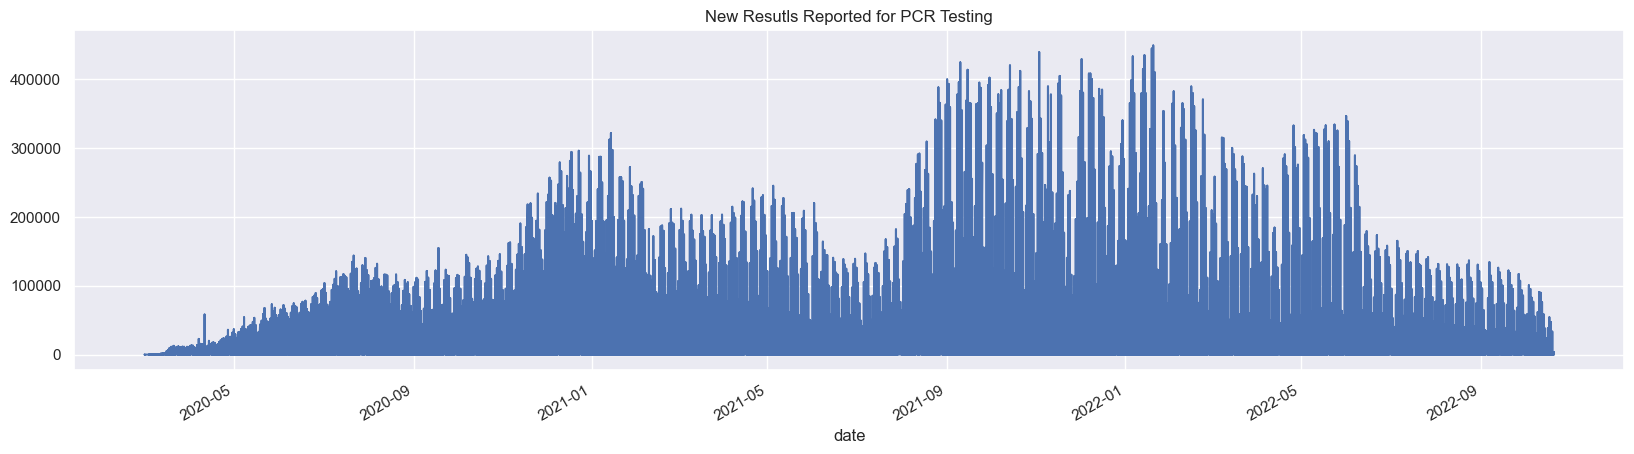

In [ ]:
df_comp.new_results_reported.plot(figsize =(20,5),title = "New Resutls Reported for PCR Testing")
plt.show()

In [ ]:
# White noise in Time series (TS)
# def white nose is a special type of time-series, where the data doesn't follow a pattern
# no patterns found - unpredictable
# 1. constant mean 
# 2. constant variance
# 3. no autocorrelation in any period
# autocorrelation measures how correlated a series is with past versions of itself 
# NO autocorrelation = NO clear relationship between past and present value 

In [ ]:
df["wn"]= wn

C:\Users\lisad\AppData\Local\Temp\ipykernel_14372\2477116740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wn"]= wn


In [ ]:
df.describe()

,new_results_reported,PCR_test,wn
count,125575.000000,125575.000000,125575.000000
mean,6675.576158,6675.576158,6592.621230
std,21825.835003,21825.835003,21770.666852
min,0.000000,0.000000,-93323.830835
25%,22.000000,22.000000,-8157.878253
50%,465.000000,465.000000,6611.523350
75%,4065.000000,4065.000000,21276.708154
max,448238.000000,448238.000000,114287.171541


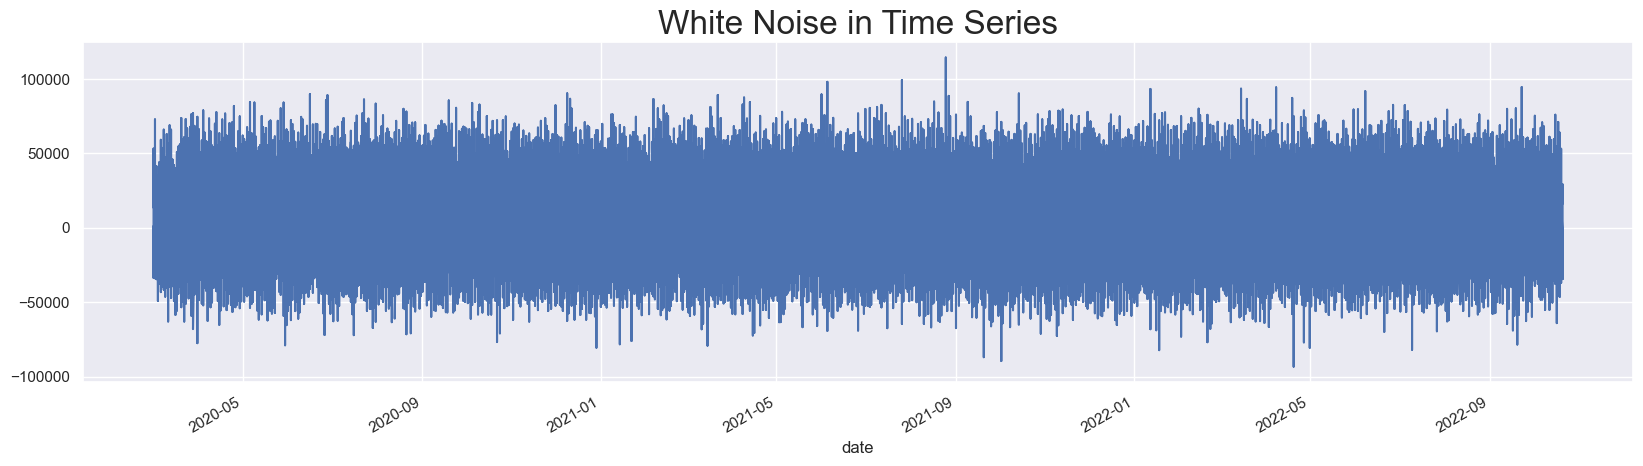

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise in Time Series", size = 24)
plt.show()


In [ ]:
# no clear pattern in data except for most values forming around the mean
# see how many values are within some proximity of the mean of PCR_test 


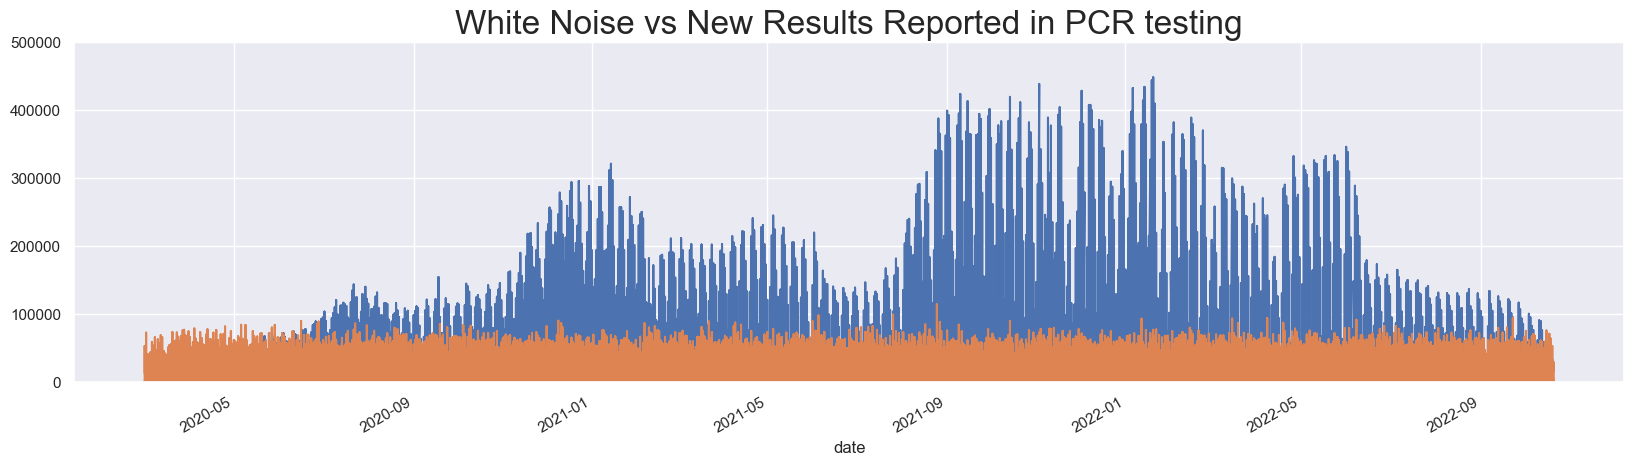

In [ ]:
df.PCR_test.plot(figsize= (20,5))
df.wn.plot(figsize = (20,5))
plt.title("White Noise vs New Results Reported in PCR testing", size = 24)
plt.ylim(0, 500000)
plt.show()

In [ ]:
sts.adfuller(df.PCR_test)

(-7.408732170618658,
 7.228139124737943e-11,
 72,
 125502,
 {'1%': -3.4304021062115018,
  '5%': -2.861563030180707,
  '10%': -2.566782258150325},
 2417073.7975664325)

In [ ]:
#Output of Dickey Fuller test
# 1. test statistic (-354.47)- compare it to certain critical values to determine if we have significant proof of stationarity
# python provides us with the 1%, 5% and 10% critical values for the dickey fuller table 
# use any of them as level of significance in our analysis
# t-stat is less than any of the critical values 
# for all of these levels of significance, we find sufficient evidence of stationarity in the dataset 
# 2. p-value -  associated with t-stat (0.0)
# rejecting the null hypothesis- data is stationary 
# 3. # of lags in the regression when determining t-stat  (0)- autocorrelation used to determine proper model 
# 4. number of observations used in the analysis (125574)- depends on the number of lags used in the regression - two should add up to the size of the dataset 
# 5. maximized information criteria provided- there is some autocorrelation
# higher values, the more difficult it is to make predictions for the future 

In [ ]:
sts.adfuller(df.wn)

(-354.4702952804052,
 0.0,
 0,
 125574,
 {'1%': -3.4304020763349037,
  '5%': -2.861563016975805,
  '10%': -2.566782251121803},
 2863271.987938293)

In [ ]:
# no autocorrelation in white noise - no lags involved in the regression
# a p-value close to 0 and no lags being part of the regression

In [ ]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

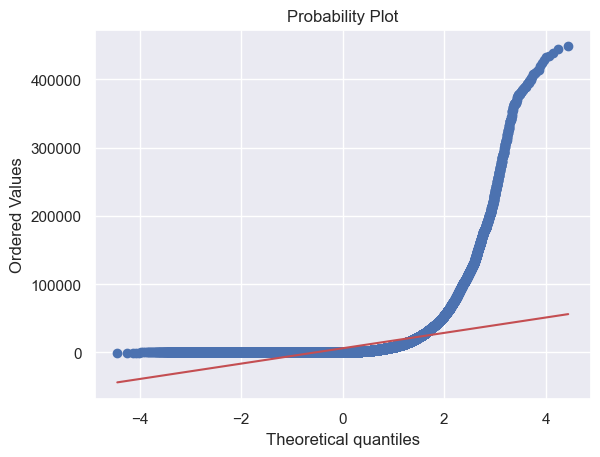

In [ ]:
scipy.stats.probplot(df_comp.new_results_reported, plot= pylab)
pylab.show

In [ ]:
#test, then explore plot
# QQ plot takes all the values a variable can take and arranges them in ascending order
# y axis- New Results Reported
# x axis- Theoretical Quantile - how many standard deviations away from the mean these values are
# red diagonoal line- what the data points should follow if they are normally distributed
# not normally distributed - more values on 500 mark
# data is trending upwards
# split data into training and test set to use machine learning to forecast the future

In [ ]:
df.PCR_test.dropna()

date
2020-03-01      96
2020-03-01      16
2020-03-02      72
2020-03-02       6
2020-03-03      94
              ... 
2022-06-02    1096
2022-06-03      13
2022-06-03    5870
2022-06-03    1030
2022-06-04       8
Name: PCR_test, Length: 125575, dtype: int64

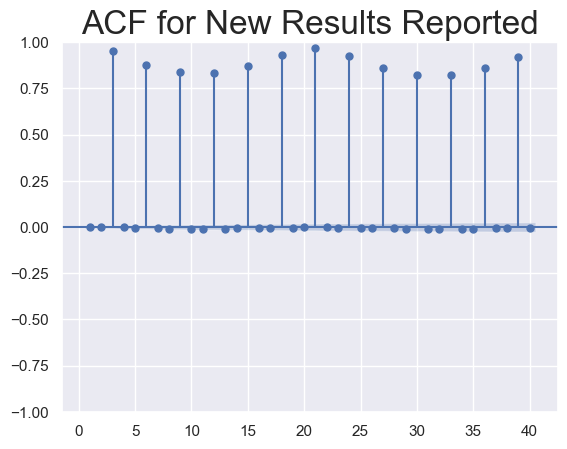

In [ ]:
sgt.plot_acf(df.PCR_test, lags = 40, zero = False)
plt.title("ACF for New Results Reported", size = 24)
plt.show()

In [ ]:
# bottom = lags; left = values of AC coefficient
# corr - values between 1 and -1
# thin line - represents the AC (autocorrelation) from the TS and a lagged copy of itself
# 1st line - AC one time period ago - t-1 etc 
# blue area around the x-axis represents significance
# values situated outside are significantly different from 0 suggests the existence of AC
# the greater the distance in time, the more unlikely it is that this AC persists
# e.g. today's PCR test results are more closer to yesterday's PCR test results than PCR test results one month ago
# AC coefficient in higher lags is sufficiently greater to be significantly different from 0 
# AC barely diminshes as the lags decrease
# suggests that results from a month back can serve as decent estimators

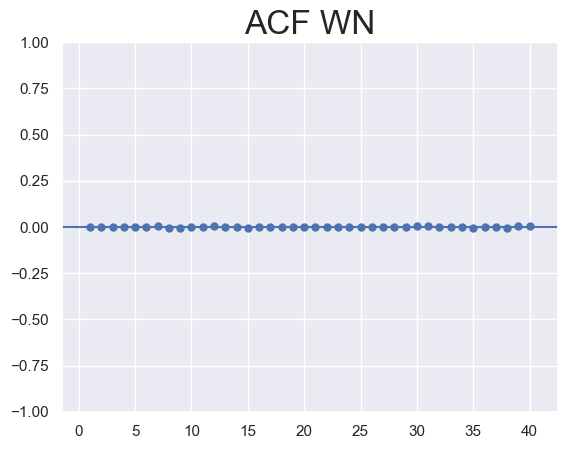

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

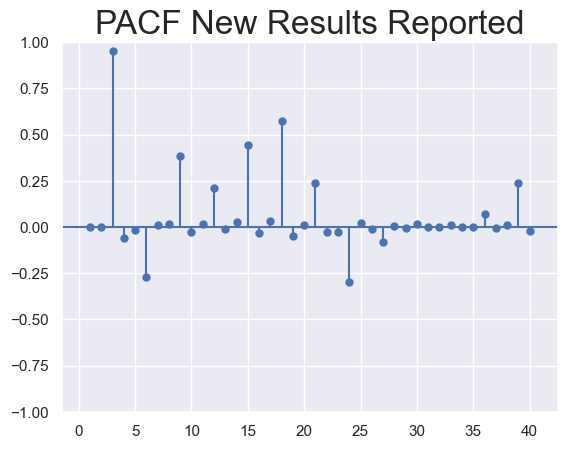

In [ ]:
sgt.plot_pacf(df.PCR_test, lags =  40, zero = False, method = ("ols") )
# Order of Least Squares - OLS 
plt.title("PACF New Results Reported", size = 24)
plt.show()

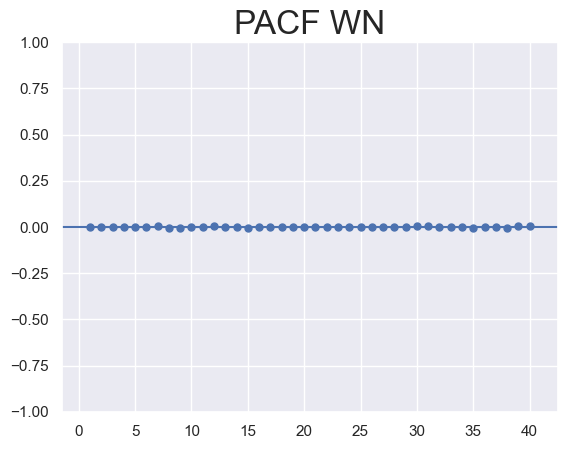

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ("ols"))
plt.title("PACF WN", size = 24)
plt.show()

Creating Returns

In [ ]:
df['returns'] = df.PCR_test.pct_change(1)*100
df= df.iloc[1:]

The ARIMA Model

In [ ]:
# Order - p, d, and q 
# P and q reprsent the AR and MA lags respectively
# d order is the integration--> the number of times we need to integrate the timepseries to ensure stationarity 
# No integration:
# ARIMA(0, 0 , q) =  MA)(q)
# ARIMA(p, 0, 0) = AR(p)
# ARIMA (p, 0, q) = ARMA (p,q)
# Integration - accounting for the non- seasonal difference between periods
# AR components= differences between PCR test results
# ARIMA (1, 1, 1)
# lose observations - for any integration we lose a single observation
# no previous period 


LLR Test

In [ ]:
def LLR_Test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 20).llf
    L2 = mod_2.fit(start_ar_lags = 20).llf
    LR = (2*(L2-L1))
    p =  chi2.sf(LR, DF).round(3)
    return p 

Creating Returns

In [ ]:
df['returns']= df.PCR_test.pct_change(1)*100

ARIMA(1,1,1)

In [ ]:
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model_ar_1_i_1_ma_1 = sm.tsa.arima.ARIMA(df.PCR_test, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
print(results_ar_1_i_1_ma_1.summary())


C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsm

                               SARIMAX Results                                
Dep. Variable:               PCR_test   No. Observations:               125572
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1420499.321
Date:                Sun, 29 Jan 2023   AIC                        2841004.643
Time:                        23:43:59   BIC                        2841033.865
Sample:                             0   HQIC                       2841013.421
                             - 125572                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4073      0.002   -227.546      0.000      -0.411      -0.404
ma.L1         -0.9694      0.000  -2535.794      0.000      -0.970      -0.969
sigma2      7.058e+08   1.11e-12   6.38e+20      0.0

In [ ]:
# 2 coefficients
# integration order has no effect on the number of parameters we need to estimate
# Integration - we a re transforming the underlyuing data while no modellin is performed

Residuals of ARIMA(1,1,1)

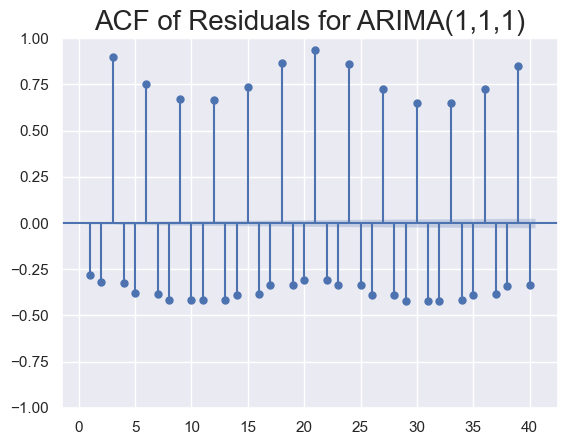

In [ ]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero= False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,1)", size = 20)
plt.show()

In [ ]:
# 3, 21 and 38 lags are highly significant
# incorporating lags into model might significantly improve performance
# residuals follow the same pattern as ACF – no significant time period to use 
# try and see how the models that contain them perform

Higher- Lag ARIMA Model

In [ ]:
model_ar_1_i_1_ma_2 = sm.tsa.arima.ARIMA(df.PCR_test, order = (1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = sm.tsa.arima.ARIMA(df.PCR_test, order = (1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_1_i_1_ma_1 = sm.tsa.arima.ARIMA(df.PCR_test, order = (2,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
model_ar_1_i_1_ma_1 = sm.tsa.arima.ARIMA(df.PCR_test, order = (3,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
model_ar_1_i_1_ma_2 = sm.tsa.arima.ARIMA(df.PCR_test, order = (3,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()


C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsm

In [ ]:
start_ar_lags=  5

In [ ]:
# provide enough starting AR lags for each model to allow for the execution of the fit model 
#.fit(start_ar_lags=  number)
#print the ".llf" and ".aic" store the log-likelihood and the AIC values for each model

In [ ]:
print("ARIMA(1,1,1):  \t LL = " , results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = " , results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = " ,results_ar_1_i_1_ma_3.llf,  "\t AIC = ",  results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = " , results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = " , results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_1.llf,  "\t AIC = ",  results_ar_1_i_1_ma_1.aic)
    

ARIMA(1,1,1):  	 LL =  -1285534.291750092 	 AIC =  2571078.583500184
ARIMA(1,1,2):  	 LL =  -1282673.515205816 	 AIC =  2565359.030411632
ARIMA(1,1,3):  	 LL =  -1404408.0991085828 	 AIC =  2808826.1982171657
ARIMA(2,1,1):  	 LL =  -1285534.291750092 	 AIC =  2571078.583500184
ARIMA(3,1,1):  	 LL =  -1285534.291750092 	 AIC =  2571078.583500184
ARIMA(1,1,2):  	 LL =  -1285534.291750092 	 AIC =  2571078.583500184


In [ ]:
# highest log likelihood and the lowest AIC - model 2


In [ ]:
#Examining the ACF of residuals 

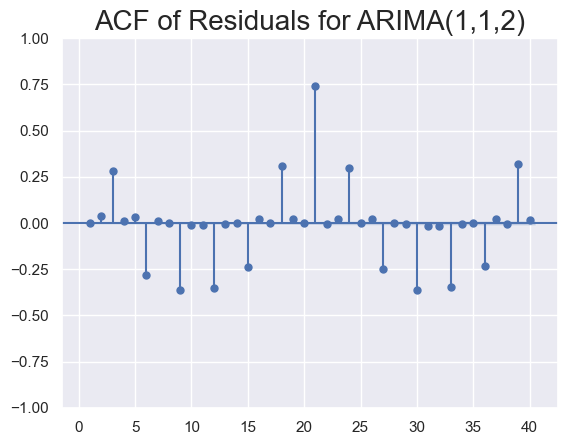

In [ ]:
df['res_ar_1_i_1_ma_2'] = results_ar_1_i_1_ma_2.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_2, zero= False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,2)", size = 20)
plt.show()

In [ ]:
model_ar_5_i_1_ma_1 = sm.tsa.arima.ARIMA(df.PCR_test, order = (5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_3 = sm.tsa.arima.ARIMA(df.PCR_test, order = (6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()



C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsm

In [ ]:
print("ARIMA(1,1,3):  \t  LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t  LL = " , results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t  LL = " , results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	  LL =  -1404408.0991085828 	 AIC =  2808826.1982171657
ARIMA(5,1,1):  	  LL =  -1280610.6724858566 	 AIC =  2561235.344971713
ARIMA(6,1,3):  	  LL =  -1276548.826927627 	 AIC =  2553117.653855254


In [ ]:
# AIC (6, 1, 3) is preferred
# The ARIMA(1,1,3) and ARIMA (5,1,1) are nested in the ARIMA (6,1,3)
#ARIMA(1,1,3) - 4 degrees of freedom 
#ARIMA(6,1,3) - 9 degrees of freedom


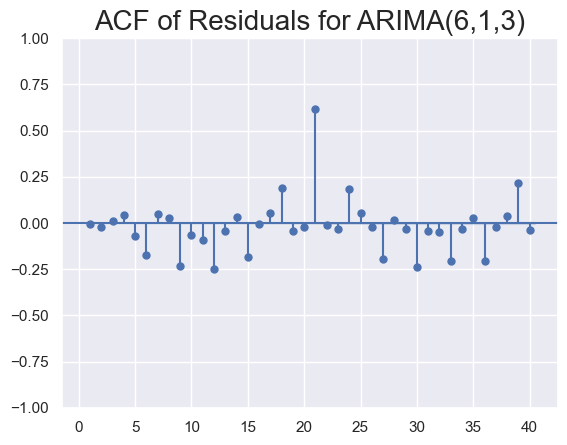

In [ ]:
df['res_ar_6_i_1_ma_3'] = results_ar_6_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_6_i_1_ma_3, zero= False, lags = 40)
plt.title("ACF of Residuals for ARIMA(6,1,3)", size = 20)
plt.show()

Models with Higher Levels of Integration 

In [ ]:
# captured effects incorporated into the 6th lag without including in model 
# the further back in time we go, the less relevant the values become
# include up to 40 lags into the model, we will have WN residuals
# want the model to predict other time-series data as well
# the model parameters will become too dependent on the data set - lead to overfitting (removing predictive power)
# best estimator for PCR tests - ARIMA(6,1,3)


In [ ]:
df['delta_new_results_reported'] = df.PCR_test.diff(1)

In [ ]:
model_delta_ar_1_i_1_ma_1 = sm.tsa.arima.ARIMA(df.delta_new_results_reported[1:], order = (1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
print(results_delta_ar_1_i_1_ma_1.summary())

C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsm

                                   SARIMAX Results                                    
Dep. Variable:     delta_new_results_reported   No. Observations:               125571
Model:                         ARIMA(1, 0, 1)   Log Likelihood            -1420499.913
Date:                        Mon, 30 Jan 2023   AIC                        2841007.827
Time:                                00:12:46   BIC                        2841046.789
Sample:                                     0   HQIC                       2841019.531
                                     - 125571                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.036e-05      3.531   1.43e-05      1.000      -6.921       6.921
ar.L1         -0.4073      0.002   -164.297      0.000      -0.412 

In [ ]:
sts.adfuller(df.delta_new_results_reported[1:])

(-47.07790204397484,
 0.0,
 71,
 125499,
 {'1%': -3.4304021074571036,
  '5%': -2.86156303073124,
  '10%': -2.5667822584433555},
 2417053.6600029585)

In [ ]:
# test statistic is 14x greater in absolute value and the critical 1% value
# p-value  is 0.0 - confirmation of stationarity
# no need for additional layers of integration
# fitting ARIMA models with d> 1 is not recommended since the series is already stationary

In [ ]:
# Forecasting 
# Time series we expect patterns to persist as we progress through time 
# 1. find the pattern - selecting the correct model 
# 2. predict the future


In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
df_comp["ret_new_results_reported"] = df_comp.new_results_reported.pct_change(1).mul(100)

In [ ]:
df_comp.ret_new_results_reported = df_comp.ret_new_results_reported

In [ ]:
df_comp["norm_ret_new_results_reported"] = df_comp.ret_new_results_reported.div(df_comp.ret_new_results_reported[1])*100

Fitting a Model

In [ ]:
model_ar = sm.tsa.ARIMA(df.new_results_reported, order =(1, 0, 0))
results_ar = model_ar.fit()

C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lisad\.conda\lib\site-packages\statsm

Simple Forecasting

In [ ]:
# Specify a time period 
# the starting point of the forecasted period is the first one we do not have values for 
# the first day after the end of the training set

In [ ]:
df.tail()

,new_results_reported,PCR_test,ret_new_results_reported,norm_ret_new_results_reported
date,,,,
2022-06-02,1096,1096,-77.568563,93.082276
2022-06-03,13,13,-98.813869,118.576642
2022-06-03,5870,5870,45053.846154,-54064.615385
2022-06-03,1030,1030,-82.453152,98.943782
2022-06-04,8,8,-99.223301,119.067961


In [ ]:
# Create variables that will help us change the periods easily instead of typing them up every time 
# make sure that the start and end dates are business days, otherwise the code will resilt in an error
start_date = "2020-03-01"
end_date = "2021-01-01"

In [ ]:

df_pred = results_ar.predict(start=start_date, end= end_date)

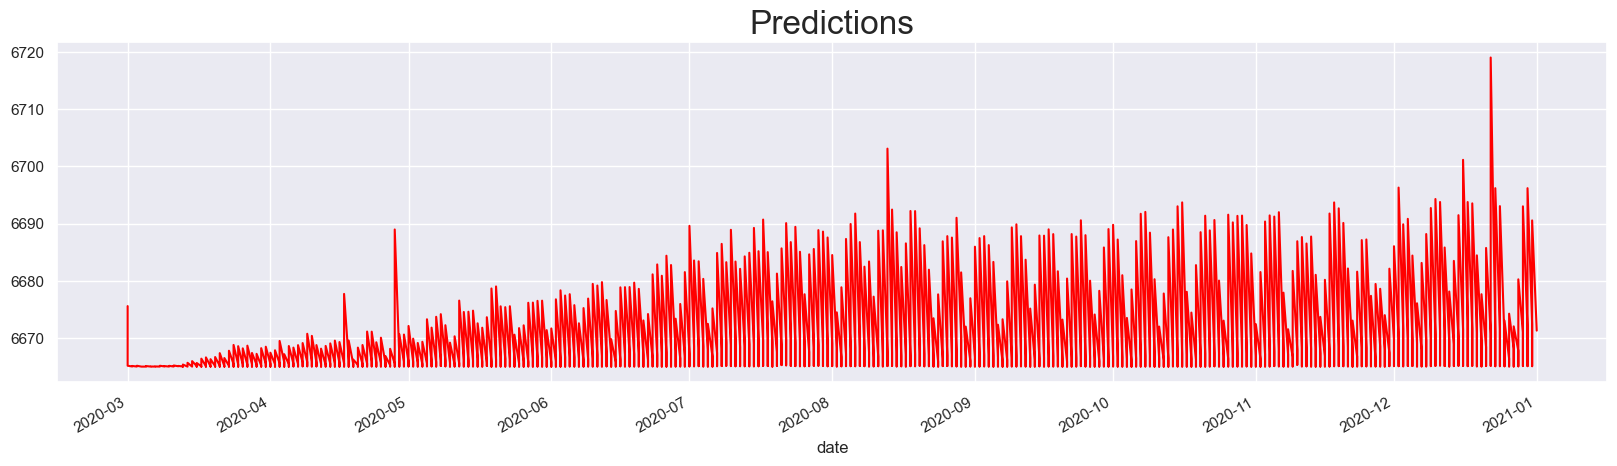

In [ ]:
df_pred[start_date:end_date].plot(figsize = (20, 5), color = "red")
plt.title("Predictions", size = 24)
plt.show()

In [ ]:
# over the course of the interval actual PCR test results moved cyclically and fluctated up and down compared to the stationary predicted values
# upwards trend
# plot is skewed to the right 
# 2021-01 as the highest peak of 6720 new results reported

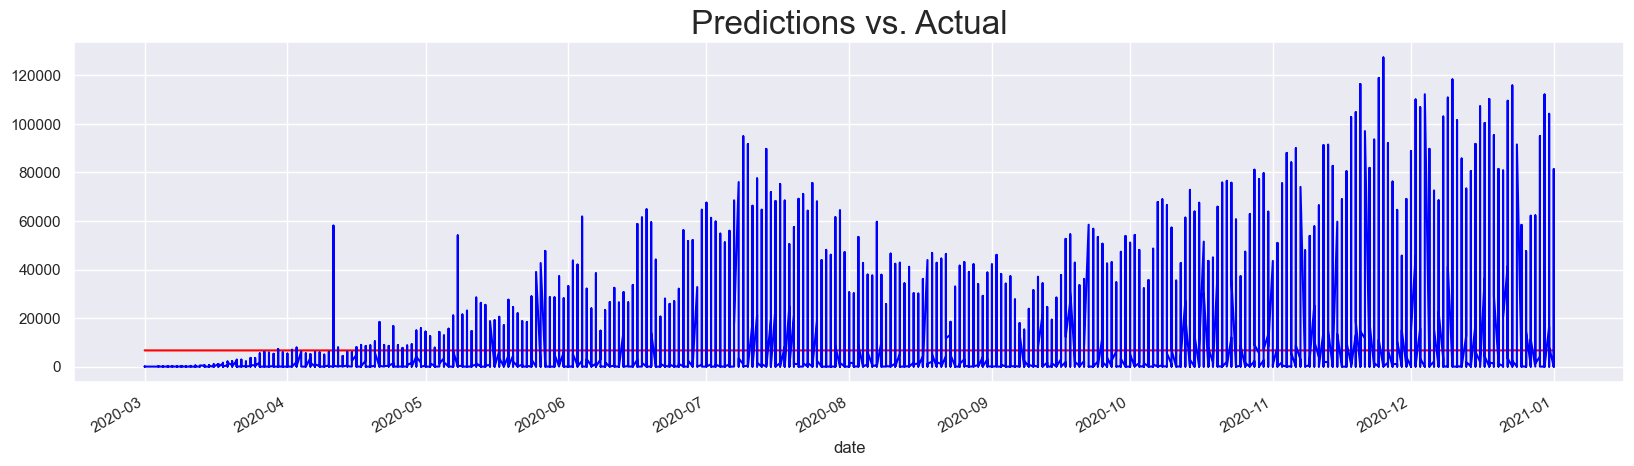

In [ ]:
df_pred[start_date:end_date].plot(figsize = (20, 5), color = "red")
df_test.new_results_reported[start_date:end_date].plot(color ="blue")
plt.title("Predictions vs. Actual", size = 24)
plt.show()

In [ ]:
# Constant line at the 0 - model makes no predictions since it assumes all future returns will be 0, or extremely close to it
# coefficients for the past values and values themselves must have low absolute values
# actual predictions are highly cyclical and greater in value with the highest peak being 2020-01 with over 120000 new results reported